# User Preference Trends (Section 2 of Portfolio)

## 0) Set up / engineering

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/rym_clean1.csv', index_col = 'position')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [3]:
df['release_date'] = pd.to_datetime(df.release_date)
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

df['p_g'] = df.primary_genres.fillna('')
df['s_g'] = df.secondary_genres.fillna('')

df['genres'] = df.p_g + ', ' + df.s_g
df['genres'] = df['genres'].str.replace(', ',',')
df['genres_list'] = df.genres.str.strip(', ').str.split(',')

df['descs'] = df['descriptors'].str.replace(', ',',')
df['descs'] = df['descs'].str.replace(',...','')
df['desc_list'] = df.descs.str.strip(', ').str.split(',')

df.drop(['release_type', 'primary_genres','secondary_genres','descriptors','p_g','s_g','genres','descs'], axis=1, inplace=True)

## 2i) Most polarised Artist Catalogues

Want to see performance of and artists over the years...

how to do this?

conditional selection of a particular artist, then find the difference in avg rating across all their albums

In [4]:
artist_list = df.artist_name.unique()

artist_dict={}

for artist in artist_list:
    artist_df = df[df.artist_name == artist]
    most_rated = artist_df[artist_df.avg_rating == artist_df.avg_rating.max()].loc[:,'release_name'].values
    least_rated = artist_df[artist_df.avg_rating == artist_df.avg_rating.min()].loc[:,'release_name'].values
    artist_dict[artist] = [artist_df.avg_rating.max() - artist_df.avg_rating.min(), most_rated, least_rated]

In [5]:
artist_variation_df = pd.DataFrame(artist_dict).T
artist_variation_df
artist_variation_df.rename({0:'Max-Min Rating', 1: 'Best Rated Album', 2:  'Worst Rated Album'}, axis=1, inplace = True)
artist_variation_df['Best Rated Album'] = artist_variation_df['Best Rated Album'].astype(str)
artist_variation_df['Best Rated Album'] = artist_variation_df['Best Rated Album'].str.strip('[')
artist_variation_df['Best Rated Album'] = artist_variation_df['Best Rated Album'].str.strip(']')
artist_variation_df['Best Rated Album'] = artist_variation_df['Best Rated Album'].str.strip("'")


artist_variation_df['Worst Rated Album'] = artist_variation_df['Worst Rated Album'].astype(str)
artist_variation_df['Worst Rated Album'] = artist_variation_df['Worst Rated Album'].str.strip('[')
artist_variation_df['Worst Rated Album'] = artist_variation_df['Worst Rated Album'].str.strip(']')
artist_variation_df['Worst Rated Album'] = artist_variation_df['Worst Rated Album'].str.strip("'")


display(artist_variation_df.sort_values('Max-Min Rating', ascending=False)[:10])

tab_md = artist_variation_df.sort_values('Max-Min Rating', ascending=False)[:10].to_markdown()
path = f'tables/ts/artist_polarisation.txt'
with open(path,'w') as f:
    f.write(tab_md)

,Max-Min Rating,Best Rated Album,Worst Rated Album
Eminem,2.63,The Marshall Mathers LP,Revival
The Clash,2.35,London Calling,Cut the Crap
Weezer,2.31,Weezer [Blue Album],Raditude
Logic,2.24,No Pressure,Supermarket
Metallica,2.24,Ride the Lightning,St. Anger
Nas,2.23,Illmatic,Nastradamus
Green Day,2.23,Dookie,Father of All…
David Bowie,2.11,The Rise and Fall of Ziggy Stardust and the Sp...,Never Let Me Down
The Velvet Underground,2.1,The Velvet Underground,Squeeze
Kid Cudi,2.08,Man on the Moon: The End of Day,"""Speedin' Bullet 2 Heaven"""


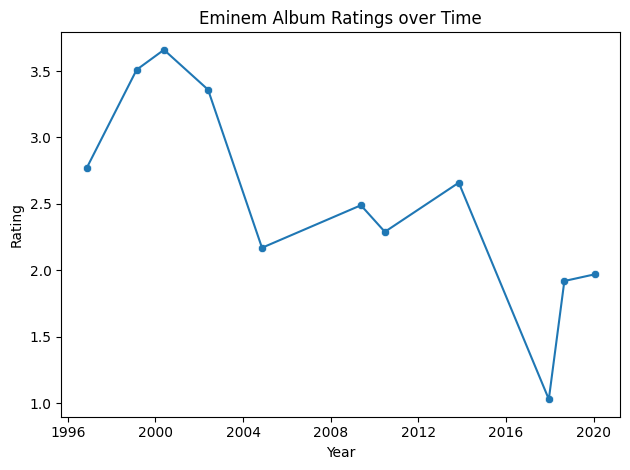

In [6]:
sns.scatterplot(data = df[df.artist_name == 'Eminem'], x = 'release_date', y = 'avg_rating')
sns.lineplot(data = df[df.artist_name == 'Eminem'], x = 'release_date', y = 'avg_rating')
plt.title('Eminem Album Ratings over Time')
plt.ylabel('Rating')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('plots/ts/Eminem')

## 2ii) Most polarised Genres - **Unused**

Want to see performance of genres over the years...

how to do this?

conditional selection of a particular genre, then groupby year, sortby year

take first five years average, minus from latest five year average
add to dictionary attatched to genre name

turn dict to a df, and sort by change in rating

In [7]:
genre_list = df.genres_list.explode().unique()

genre_variation_dict = {}

for genre in genre_list:
    genre_df = df[df.genres_list.apply(lambda x: genre in x)]
    groupd = genre_df.groupby('year')['avg_rating'].mean()

    genre_variation_dict[genre] =     [groupd.max() - groupd.min()]


In [8]:
genre_variation_df = pd.DataFrame(genre_variation_dict).T
genre_variation_df.sort_values(0, ascending=False)

,0
Rock Opera,3.37
Comedy Rock,3.30
Satire,3.28
Acoustic Rock,3.27
Musical Parody,3.18
...,...
Mariachi,0.00
Cumbiamexicana,0.00
Sonjarocho,0.00
Circus March,0.00


<Axes: xlabel='year', ylabel='avg_rating'>

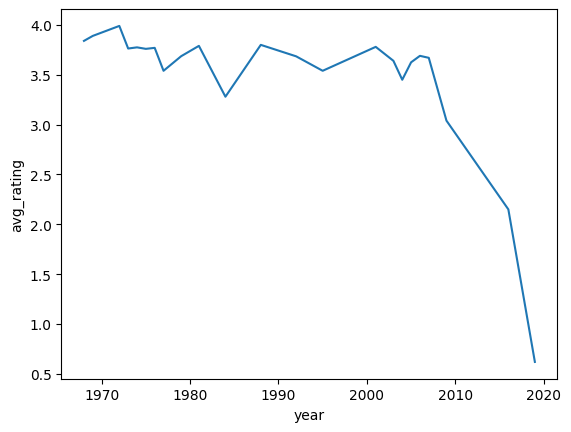

In [9]:
genre_df = df[df.genres_list.apply(lambda x: 'Rock Opera' in x)]
sns.lineplot(genre_df.groupby('year')['avg_rating'].mean())#, x = 'release_date', y = 'avg_rating')

## 2iii) Most polarised Descriptors - **Unused**

In [10]:
df.head()

,release_name,artist_name,release_date,avg_rating,rating_count,review_count,year,month,genres_list,desc_list
position,,,,,,,,,,
1,OK Computer,Radiohead,1997-06-16,4.24,74027,1541,1997,6,"[Alternative Rock, Art Rock]","[melancholic, anxious, futuristic, malevocals,..."
2,Kid A,Radiohead,2000-10-03,4.23,61658,751,2000,10,"[Art Rock, Experimental Rock, Electronic, Ambi...","[cold, melancholic, futuristic, anxious, atmos..."
3,The Dark Side of the Moon,Pink Floyd,1973-03-23,4.21,60192,1557,1973,3,"[Art Rock, Progressive Rock, Psychedelic Rock,...","[philosophical, atmospheric, introspective, ex..."
4,Loveless,My Bloody Valentine,1991-11-11,4.24,53174,1264,1991,11,"[Shoegaze, Noise Pop, Dream Pop, Neo-Psychedelia]","[noisy, ethereal, atmospheric, romantic, love,..."
5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,4.09,52149,638,2010,11,"[Pop Rap, Hip Hop, Art Pop]","[epic, boastful, passionate, sampling, hedonis..."


In [11]:
desc_list = df.desc_list.explode().unique()

desc_variation_dict = {}

for desc in desc_list:
    desc_df = df[df.desc_list.apply(lambda x: desc in x)]
    groupd = desc_df.groupby('year')['avg_rating'].mean()

    desc_variation_dict[desc] =     [groupd.max() - groupd.min()]


In [12]:
desc_variation_df = pd.DataFrame(desc_variation_dict).T
desc_variation_df.sort_values(0,ascending=False)

,0
satirical,3.520
rockopera,3.395
religious,3.020
parody,2.920
suicide,2.405
...,...
ensemble,0.000
symphony,0.000
opera,0.000
carol,0.000


<Axes: xlabel='year', ylabel='avg_rating'>

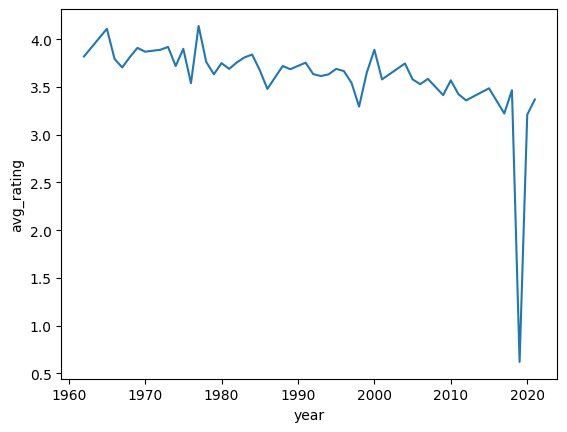

In [13]:
desc_df = df[df.desc_list.apply(lambda x: 'satirical' in x)]
sns.lineplot(desc_df.groupby('year')['avg_rating'].mean())
# sns.lineplot(data = desc_df, x = 'release_date', y = 'avg_rating')

## 2iv) Trends in Genre average rating over time

want to look at trends in genre and descriptor performance over time.

Take Chatgpt approach, find linear model w scipy for given genres

In [14]:
#separating out genres
df_expl = df.explode('genres_list')

# Take a list of genres to fit, notice condition of 50 entries!
genres = df_expl.genres_list.value_counts()[df_expl.genres_list.value_counts()>50].index.tolist()

In [15]:
#loop to find gradients of all genre trends

genre_trends = {}

for genre in genres:
    
    lr = LinearRegression()

    genre_df = df_expl[df_expl.genres_list == genre]
    
    lr.fit(genre_df[['year']], genre_df[['avg_rating']])
    
    genre_trends[genre] = [lr.coef_[0][0], len(genre_df)]

# Compare with entire data's trend

lr = LinearRegression()
lr.fit(df[['year']],df[['avg_rating']])
m_tot = lr.coef_[0][0]

In [16]:
genre_trend_df = pd.DataFrame(genre_trends, index=['gradient', 'count']).T
genre_trend_df['beat_tot'] = genre_trend_df.gradient > m_tot

display(genre_trend_df.sort_values('gradient',ascending=False))

tab_md = genre_trend_df.sort_values('gradient',ascending=False).to_markdown()
path = f'tables/ts/genre_fit.txt'
with open(path,'w') as f:
    f.write(tab_md)

,gradient,count,beat_tot
Noise,0.005369,53.0,True
Sound Collage,-0.001153,52.0,True
Krautrock,-0.001421,66.0,True
Baroque Pop,-0.002150,103.0,True
Experimental,-0.002514,51.0,True
...,...,...,...
Alt-Pop,-0.030786,57.0,False
Cloud Rap,-0.032306,78.0,False
Grunge,-0.032632,54.0,False
Southern Hip Hop,-0.037225,75.0,False


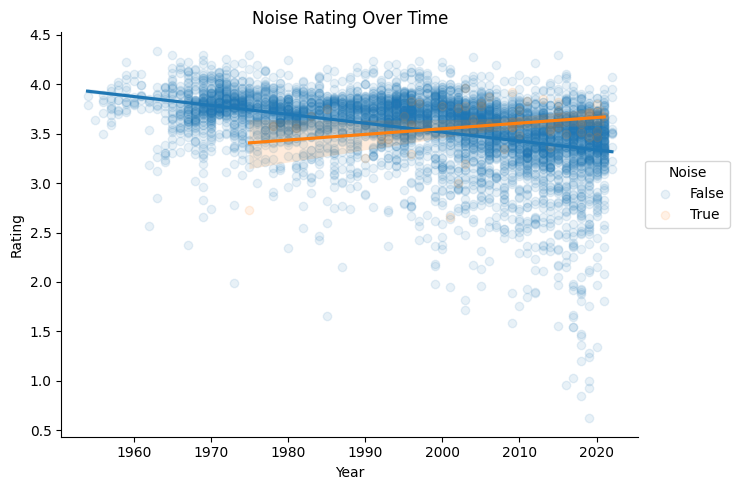

In [17]:
#writing a hue to compare regression of a particular genre with whole dataset's regression
choosen_genre = 'Noise'
genre_hue = df.genres_list.apply(lambda x :  choosen_genre in x)
df_plot = df.copy()
df_plot[choosen_genre] = genre_hue


sns.lmplot(df_plot,x='year',y='avg_rating', hue=choosen_genre, scatter_kws = {'alpha':0.1}, legend=False, height=5, aspect=1.5)
plt.legend(loc='lower left', title=choosen_genre, bbox_to_anchor=(1,0.5))
plt.title(f'{choosen_genre} Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig(f'plots/ts/{choosen_genre}_performance')

In [20]:
# sns.lmplot(df_expl,x='year',y='avg_rating', hue='genres_list') 

## 2v) Apply the same method for descriptors

In [21]:
df_expl_d = df.explode('desc_list')

# Take a list of genres to fit, notice condition of 50 entries!
descs = df_expl_d.desc_list.value_counts()[df_expl_d.desc_list.value_counts()>50].index.tolist()

In [22]:
#loop to find gradients of all genre trends

desc_trends = {}

for desc in descs:
    
    lr = LinearRegression()

    desc_df = df_expl_d[df_expl_d.desc_list == desc]
    
    lr.fit(desc_df[['year']], desc_df[['avg_rating']])
    
    desc_trends[desc] = [lr.coef_[0][0], len(desc_df)]

In [23]:
desc_trend_df = pd.DataFrame(desc_trends, index=['gradient', 'count']).T
desc_trend_df['beat_tot'] = desc_trend_df.gradient > m_tot

display(desc_trend_df.sort_values('gradient',ascending=False))

tab_md = desc_trend_df.sort_values('gradient',ascending=False).to_markdown()
path = f'tables/ts/desc_fit.txt'
with open(path,'w') as f:
    f.write(tab_md)

,gradient,count,beat_tot
pastoral,-0.002582,168.0,True
chaotic,-0.003141,195.0,True
dissonant,-0.003249,178.0,True
forest,-0.003449,53.0,True
peaceful,-0.004537,132.0,True
...,...,...,...
anthemic,-0.019250,336.0,False
vulgar,-0.020393,160.0,False
alcohol,-0.022917,64.0,False
hateful,-0.024381,68.0,False


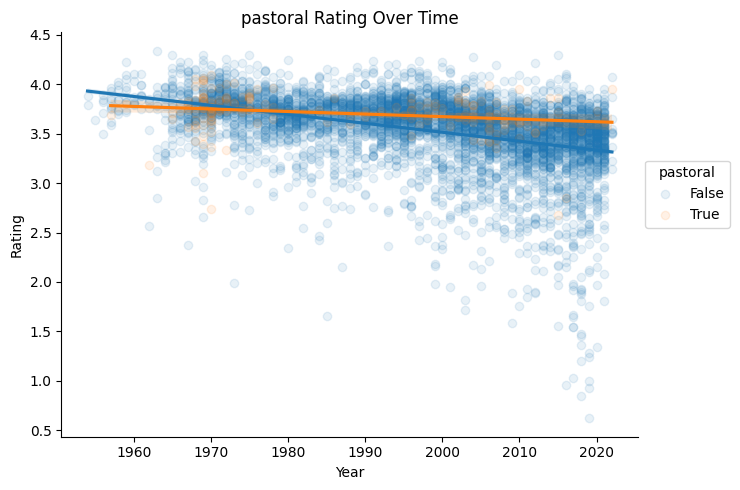

In [24]:
#writing a hue to compare regression of a particular genre with whole dataset's regression
choosen_desc = 'pastoral'
desc_hue = df.desc_list.apply(lambda x : choosen_desc in x)
df_plot = df.copy()
df_plot[choosen_desc] = desc_hue
# sns.lmplot(df_plot,x='year',y='avg_rating', hue=choosen_desc, scatter_kws = {'alpha':0.1})

sns.lmplot(df_plot,x='year',y='avg_rating', hue=choosen_desc, scatter_kws = {'alpha':0.1}, legend=False, height=5, aspect=1.5)
plt.legend(loc='lower left', title=choosen_desc, bbox_to_anchor=(1,0.5))
plt.title(f'{choosen_desc} Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig(f'plots/ts/{choosen_desc}_performance')

In [25]:
# df_expl_d[df_expl_d.desc_list == 'pastoral'].sort_values('year',ascending=False)

## 2vi) Apply method for artists

In [26]:
artists = df.artist_name.value_counts()[df.artist_name.value_counts()>5].index.tolist()

In [27]:
artist_trends = {}

for artist in artists:
    
    lr = LinearRegression()

    artist_df = df[df.artist_name == artist]
    
    lr.fit(artist_df[['year']], artist_df[['avg_rating']])
    
    artist_trends[artist] = [lr.coef_[0][0], len(artist_df)]

In [28]:
artist_trend_df = pd.DataFrame(artist_trends, index=['gradient', 'count']).T
artist_trend_df['beat_tot'] = artist_trend_df.gradient > m_tot

display(artist_trend_df.sort_values('gradient',ascending=False))

# tab_md = artist_trend_df.sort_values('gradient',ascending=False).to_markdown()
# path = f'tables/ts/artist_fit.txt'
# with open(path,'w') as f:
#     f.write(tab_md)

,gradient,count,beat_tot
"Tyler, the Creator",0.096964,7.0,True
Tim Buckley,0.088889,6.0,True
The Kinks,0.087009,9.0,True
Beyoncé,0.060044,6.0,True
Bring Me the Horizon,0.044369,6.0,True
...,...,...,...
Talking Heads,-0.098276,8.0,False
Fall Out Boy,-0.117736,7.0,False
Drake,-0.123578,6.0,False
Logic,-0.197727,6.0,False


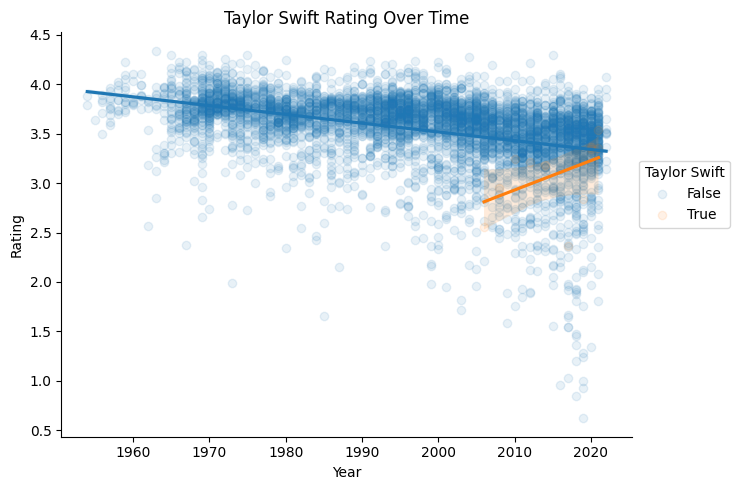

In [29]:
choosen_artist = 'Taylor Swift'
artist_hue = df.artist_name == choosen_artist
df_plot = df.copy()
df_plot[choosen_artist] = artist_hue
# sns.lmplot(df_plot,x='year',y='avg_rating', hue=choosen_artist, scatter_kws = {'alpha':0.1})

sns.lmplot(df_plot,x='year',y='avg_rating', hue=choosen_artist, scatter_kws = {'alpha':0.1}, legend=False, height=5, aspect=1.5)
plt.legend(loc='lower left', title=choosen_artist, bbox_to_anchor=(1,0.5))
plt.title(f'{choosen_artist} Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig(f'plots/ts/{choosen_artist}_performance')